Gonzalo Cardenal Antolín

# Tarea 4.2 
# Modelo competición de Lotka-Volterra

Las ecuaciones del modelo competición de Lotka_Volterra está constituido por dos ecuaciones difrenciales orrdinarias no lineales que constituyen un modelo simplificado de la interacción de dos poblaciones que compiten entre sí por un mismo recurso para su subsitencia, por ejemplo conejos y ardillas. Las variables $x$ e $y$ representan respectivamnete, el número de individuos de la población de conejos y de zorros, que depende del tiempo $t$. Estas son las ecuaciones


\begin{align}
 \frac{dx}{dt} &= a_1x-b_1x^2-c_1xy\\
 \frac{dy}{dt} &= a_2y-b_2y^2-c_2xy
\end{align}


Aquí $a_i,$ $b_i$ y $c_i$ son los parámetros del modelo. Son números reales positivo. Ambas especies crecen según un modelo logístico en ausencia de la otra. En este caso $k_i= a_i/b_i$ es la población máxima de la especie $i;$ $x$ es la especie $1,$ $y$ es la especie $2,$ Ademas, la presencia de una especie disminuye la tasa de crecimiento de la otra.

Utilizando el parámetro población máxima se podría escribir:

\begin{align}
 \frac{dx}{dt} &= a_1x\left(1-\frac{x}{a_1/b_1}\right)-c_1xy\\
 \frac{dy}{dt} &= a_2y\left(1-\frac{y}{a_2/b_2}\right)-c_2xy
\end{align}

### Estudiar la estabilidad de este modelo
1. Puntos de equilibrio
2. Matriz Jacobiana
3. Matriz de la interacción en cada punto de equilibrio
4. Plano de fases de cada uno de los diferentes comportamientos que se observan

### Indicaciones:
1. Todos los puntos de equilibrio son biológicamente viables para todos los valores posibles de los parámetros excepto uno. Las corrdenadas de este punto son  
$$
(x_4^*, y_4^*)=\left( \frac{a_{1} b_{2} - a_{2} c_{1}}{b_{1} b_{2} - c_{1} c_{2}}, \  - \frac{a_{1} c_{2} - a_{2} b_{1}}{b_{1} b_{2} - c_{1} c_{2}}\right)
$$
    Observad que las coordenadas de este punto tienen el mismo denominador.
2. Al calcular la matriz de la interacción en el punto $(x_4^*, y_4^*)$ observad que esta matrix tiene la forma
$$
C(x^*_4,y^*_4)=
\left(
\begin{array}{cc}
-b_1x_4^*&-c_1x_4^*\\
-c_2y_4^*&-b_2y_4^*
\end{array}
\right)
$$
   Utilizar `sp.simplify()` y las substituciones 
   - $(a_{1} b_{2} - a_{2} c_{1})/(b_{1} b_{2} - c_{1} c_{2})$ por $x_4^*$
   - $(a_{1} c_{2} - a_{2} b_{1})/(b_{1} b_{2} - c_{1}c_{2})$ por $-y_4^*$ 

para obtener esta expresión.

3. El punto de equilibrio $(x_4^*, y_4^*)$ es el punto solución del siguiente sistema lineal
\begin{align}
a_1-b_1x-c_1y=0&\\
a_2-b_2y-c_2x=0&
\end{align}
    Es el punto de intersección de las rectas que representan estas dos ecuaciones.


4. Estudiar el comportamiento del sistema considerando cuatro casos posibles de posiciones de las rectas que determina el sistema anterior. 
   - el punto de intersección está en el primer cuadrante con el denominador positivo
   - el punto de intersección está en el primer cuadrante con el denominador negativo
   - el punto de intersección no está en el primer cuadrante con el numerador de la primera coordenada negativa y el de la segunda positiva
   - el punto de intersección no está en el primer cuadrante con el numerador de la primera coordenada positiva y el de la segunda negativa
   
   Este punto de equilibrio nunca puede estar en el tercer cuadrante dado que las rectas que representan el anterior sistema solo cortan a la parte positva del los ejes coordenados.
   
5. Hacer gráficas con las rectas de cada uno de los casos anteriores, utilizando valores concretos de los parámetros, para visualizar los cuatro casos del apartado anterior.
   
6. Representar planos de fases para cada una de los casos.

7. Interpretar estas situaciones en términos de los parámetros de competición intraespecie e interespecie. El producto $b_1b_2$ es una medida conjunta de la competición intraespecies del sistema. Así mismo, el producto $c_1c_2$ es una medida conjunta de la competición interespecies del sistema.

8. Considerar $k_1=k_2$ e interpretar los diferentes tipos de comportamiento usando el parámetro $\gamma_i=c_i/b_i.$ Observad que en térrmionos de $k_i$ y $\gamma_i$ el modelo se pude escribir como

\begin{align}
 \frac{dx}{dt} &= a_1x\left(1-\frac{1}{k_1}x-\frac{\gamma_1}{k_1}y\right)\\
 \frac{dy}{dt} &= a_2y\left(1-\frac{1}{k_2}y-\frac{\gamma_2}{k_2}x\right)
\end{align}

In [1]:
import sympy as sp
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
import math as m
sp.init_printing()

In [2]:
sp.init_printing()
x, y = sp.symbols ('x y')
a1, b1, c1, a2, b2, c2, k1, k2, x4, y4 = sp.symbols('a1 b1 c1 a2 b2 c2 k1 k2 x4 y4', positive=True)

In [3]:
#definimos ecuaciones del modelo
f = a1*x*(1-x/(a1/b1))-c1*x*y
g = a2*y*(1-y/(a2/b2))-c2*x*y
f, g

In [4]:
f_k = f.subs({b1/a1:1/k1})
g_k = g.subs({b2/a2:1/k2})
f_k, g_k

#### Puntos críticos

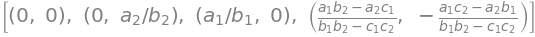

In [5]:
pto_c = (sp.solve([f, g],[x, y]))    
pto_c

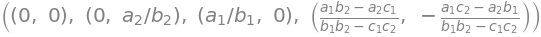

In [6]:
pto_c1 = pto_c[0]
pto_c2 = pto_c[1]
pto_c3 = pto_c[2]
pto_c4 = pto_c[3]
pto_c1,pto_c2,pto_c3,pto_c4

#### Matriz Jacobiana general

In [7]:
Jacob = sp.Matrix([[f.diff(x), f.diff(y)], [g.diff(x), g.diff(y)]])
Jacob

⎡   ⎛    b₁⋅x⎞                                           ⎤
⎢a₁⋅⎜1 - ────⎟ - b₁⋅x - c₁⋅y             -c₁⋅x           ⎥
⎢   ⎝     a₁ ⎠                                           ⎥
⎢                                                        ⎥
⎢                                ⎛    b₂⋅y⎞              ⎥
⎢           -c₂⋅y             a₂⋅⎜1 - ────⎟ - b₂⋅y - c₂⋅x⎥
⎣                                ⎝     a₂ ⎠              ⎦

#### Traza

In [8]:
traza_Jacob = sp.simplify(np.trace(Jacob))
traza_Jacob

#### Determinante

In [9]:
det_Jacob = sp.simplify(sp.det(Jacob))
det_Jacob

Iniciamos el estudio de los 4 puntos críticos

### Punto crítico trivial (0,0)

In [10]:
Jacob_pto_c1 = sp.Matrix([[f.diff(x).subs({x:pto_c1[0], y:pto_c1[1]}), f.diff(y).subs({x:pto_c1[0], y:pto_c1[1]})], [g.diff(x).subs({x:pto_c1[0], y:pto_c1[1]}), g.diff(y).subs({x:pto_c1[0], y:pto_c1[1]})]])
Jacob_pto_c1

⎡a₁  0 ⎤
⎢      ⎥
⎣0   a₂⎦

In [11]:
traza_J1 = sp.simplify(np.trace(Jacob_pto_c1))
traza_J1

In [12]:
det_J1 = sp.simplify(sp.det(Jacob_pto_c1))
det_J1

Como la gráfica y el determinante son positivos, a la hora de representarlas gráficamente estas estarán en el primer cuadrante

In [13]:
autovalores_pc1 = sp.simplify(Jacob_pto_c1.eigenvals())
autovalores_pc1

In [14]:
Jacob_pto_c1.eigenvects()

⎡⎛       ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜a₁, 1, ⎢⎢ ⎥⎥⎟, ⎜a₂, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

Los autovalores $a_1$ y $a_2$ son positivos, por lo que el punto crítico trivial tendrá un comportamiento de nodo fuente.
Esto tiene sentido ya que de ser al contrario (sumidero) ambas poblaciones tenderían a la extinción lo que carece de sentido biológico.
Si $a_1$ y $a_2$ son iguales el punto crítico tendrá un comportamiento de nodo propio fuente en el sistema linearizado y si $a_1$ y $a_2$ son distintos será nodo impropio fuente para el sistema lineal.  

### Punto crítico 2 ($\left(0, \frac{a_2}{b_2}\right)$)

En este caso, este punto crítico se corresponde con una situación en el que la población de conejos se ha extinguido y los zorros tienen un crecimiento logísitico, donde  $\frac{a_2}{b_2}$ = $K$ (capacidad de carga máxima del sistema biológico).

In [15]:
Jacob_pto_c2 = sp.simplify(sp.Matrix([[f.diff(x).subs({x:pto_c2[0], y:pto_c2[1]}), f.diff(y).subs({x:pto_c2[0], y:pto_c2[1]})], [g.diff(x).subs({x:pto_c2[0], y:pto_c2[1]}), g.diff(y).subs({x:pto_c2[0], y:pto_c2[1]})]]))
Jacob_pto_c2

⎡     a₂⋅c₁     ⎤
⎢a₁ - ─────   0 ⎥
⎢       b₂      ⎥
⎢               ⎥
⎢ -a₂⋅c₂        ⎥
⎢ ───────    -a₂⎥
⎣    b₂         ⎦

In [16]:
traza_J2 = sp.simplify(np.trace(Jacob_pto_c2))
traza_J2

In [17]:
det_J2 = sp.simplify(sp.det(Jacob_pto_c2))
det_J2

In [18]:
autovalores_pc2 = sp.simplify(Jacob_pto_c2.eigenvals())
autovalores_pc2

In [19]:
Jacob_pto_c2.eigenvects()

⎡                 ⎛               ⎡⎡-(a₁⋅b₂ + a₂⋅b₂ - a₂⋅c₁) ⎤⎤⎞⎤
⎢⎛        ⎡⎡0⎤⎤⎞  ⎜     a₂⋅c₁     ⎢⎢─────────────────────────⎥⎥⎟⎥
⎢⎜-a₂, 1, ⎢⎢ ⎥⎥⎟, ⎜a₁ - ─────, 1, ⎢⎢          a₂⋅c₂          ⎥⎥⎟⎥
⎢⎝        ⎣⎣1⎦⎦⎠  ⎜       b₂      ⎢⎢                         ⎥⎥⎟⎥
⎣                 ⎝               ⎣⎣            1            ⎦⎦⎠⎦

Todas las constantes son positivas, luego los autovalores serán reales y su comportamiento dependerá del valor de cada constante.
Como podemos observar el primer autovalor siempre es negativo, mientras que en el segundo pueden darse varios casos:
- Cuando |$a_1$| < |$\frac{a_2 c_1}{b_2}$| => $\lambda_2$ < 0, luego el punto crítico será un nodo sumidero (estable) pudiendo ser propio si $\lambda_1$ = $\lambda_2$ o impropio si $\lambda_1$ son distintos $\lambda_2$.
- Cuando |$a_1$| > |$\frac{a_2 c_1}{b_2}$| => $\lambda_2$ > 0. Luego, estaríamos antes un punto de silla.

### Punto crítico 3 $\left(\frac{a_1}{b_1},0\right)$

En este punto nos encontramos con el caso contrario, en ausencia de zorros los conejos crecen con un crecimiento logístico hasta llegar a $K$.
Donde, $\frac{a_1}{b_1}$ = $K$

In [20]:
Jacob_pto_c3 = sp.simplify(sp.Matrix([[f.diff(x).subs({x:pto_c3[0], y:pto_c3[1]}), f.diff(y).subs({x:pto_c3[0], y:pto_c3[1]})], [g.diff(x).subs({x:pto_c3[0], y:pto_c3[1]}), g.diff(y).subs({x:pto_c3[0], y:pto_c3[1]})]]))
Jacob_pto_c3 

⎡       -a₁⋅c₁    ⎤
⎢-a₁    ───────   ⎥
⎢          b₁     ⎥
⎢                 ⎥
⎢       a₁⋅c₂     ⎥
⎢ 0   - ───── + a₂⎥
⎣         b₁      ⎦

In [21]:
traza_J_pto_c3 = sp.simplify(np.trace(Jacob_pto_c3))
traza_J_pto_c3

In [22]:
det_J_pto_c3 = sp.simplify(sp.det(Jacob_pto_c3))
det_J_pto_c3

In [23]:
autovalores_pc3 = sp.simplify(Jacob_pto_c3.eigenvals())
autovalores_pc3

In [24]:
Jacob_pto_c3.eigenvects()

⎡                 ⎛                 ⎡⎡       -a₁⋅c₁        ⎤⎤⎞⎤
⎢⎛        ⎡⎡1⎤⎤⎞  ⎜  a₁⋅c₂          ⎢⎢─────────────────────⎥⎥⎟⎥
⎢⎜-a₁, 1, ⎢⎢ ⎥⎥⎟, ⎜- ───── + a₂, 1, ⎢⎢a₁⋅b₁ - a₁⋅c₂ + a₂⋅b₁⎥⎥⎟⎥
⎢⎝        ⎣⎣0⎦⎦⎠  ⎜    b₁           ⎢⎢                     ⎥⎥⎟⎥
⎣                 ⎝                 ⎣⎣          1          ⎦⎦⎠⎦

Como mencionábamos anteriormente, nos encontramos ante un caso similar donde $\lambda_1 = -a_1$ < 0. Pero el valor de $\lambda_2$ dependerá del valor de las constantes, luego:
- Cuando |$a_2$| < |$\frac{a_1 c_2}{b_1}$| => $\lambda_2$ < 0, el punto crítico es un nodo estable pudiendo ser propio si $\lambda_1$ = $\lambda_2$ o impropio si tienen valores distintos.
- Cuando |$a_2$| > |$\frac{a_1 c_2}{b_1}$| => $\lambda_2$ > 0, el punto crítico será un punto de silla.

### Punto crítico 4 = $\left(\frac{a_1 b_2 - a_2 c_1}{b_1 b_2 - c_1 c_2}, - \frac{a_1 c_2 - a_2 b_1}{b_1 b_2 - c_1 c_2}\right)$

En este caso, el punto crítico se corresponde con el valor de la intersección de las dos rectas que forman el siguiente sistema lineal:
$$
\begin{align}
a_1-b_1x-c_1y=0&\\
a_2-b_2y-c_2x=0&
\end{align}
$$

In [25]:
Jacob_pto_c4 = sp.simplify(sp.Matrix([[f.diff(x).subs({x:pto_c4[0], y:pto_c4[1]}), f.diff(y).subs({x:pto_c4[0], y:pto_c4[1]})], [g.diff(x).subs({x:pto_c4[0], y:pto_c4[1]}), g.diff(y).subs({x:pto_c4[0], y:pto_c4[1]})]]))
Jacob_pto_c4

⎡-b₁⋅(a₁⋅b₂ - a₂⋅c₁)   -c₁⋅(a₁⋅b₂ - a₂⋅c₁) ⎤
⎢────────────────────  ────────────────────⎥
⎢   b₁⋅b₂ - c₁⋅c₂         b₁⋅b₂ - c₁⋅c₂    ⎥
⎢                                          ⎥
⎢ c₂⋅(a₁⋅c₂ - a₂⋅b₁)    b₂⋅(a₁⋅c₂ - a₂⋅b₁) ⎥
⎢ ──────────────────    ────────────────── ⎥
⎣   b₁⋅b₂ - c₁⋅c₂         b₁⋅b₂ - c₁⋅c₂    ⎦

Sustituyendo:
- $(a_{1} b_{2} - a_{2} c_{1})/(b_{1} b_{2} - c_{1} c_{2})$ por $x_4^*$
- $(a_{1} c_{2} - a_{2} b_{1})/(b_{1} b_{2} - c_{1}c_{2})$ por $-y_4^*$ 

In [26]:
pto_c4 = ((a1*b2-a2*c1)/(b1*b2-c1*c2), (a1*c2 -a2*b1)/(b1*b2-c1*c2))

Jacob_pto_c4_c = Jacob_pto_c4.subs({pto_c4[0]:x4, pto_c4[1]:-y4})
Jacob_pto_c4_c

⎡-b₁⋅x₄  -c₁⋅x₄⎤
⎢              ⎥
⎣-c₂⋅y₄  -b₂⋅y₄⎦

In [27]:
traza_J_pto_c4 = sp.simplify(np.trace(Jacob_pto_c4_c))
traza_J_pto_c4

In [28]:
det_J_pto_c4 = sp.simplify(sp.det(Jacob_pto_c4_c))
det_J_pto_c4

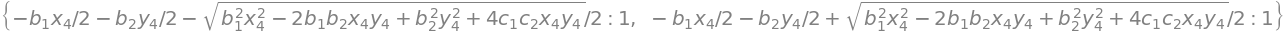

In [29]:
autovalores_pc4 = sp.simplify(Jacob_pto_c4_c.eigenvals())
autovalores_pc4

In [30]:
Jacob_pto_c4_c.eigenvects()

⎡⎛                     ___________________________________________________    
⎢⎜                    ╱   2   2                     2   2                     
⎢⎜  b₁⋅x₄   b₂⋅y₄   ╲╱  b₁ ⋅x₄  - 2⋅b₁⋅b₂⋅x₄⋅y₄ + b₂ ⋅y₄  + 4⋅c₁⋅c₂⋅x₄⋅y₄     
⎢⎜- ───── - ───── - ──────────────────────────────────────────────────────, 1,
⎢⎜    2       2                               2                               
⎢⎜                                                                            
⎣⎝                                                                            

 ⎡⎡                   ___________________________________________________⎤⎤⎞  
 ⎢⎢                  ╱   2   2                     2   2                 ⎥⎥⎟  
 ⎢⎢b₁⋅x₄ - b₂⋅y₄ + ╲╱  b₁ ⋅x₄  - 2⋅b₁⋅b₂⋅x₄⋅y₄ + b₂ ⋅y₄  + 4⋅c₁⋅c₂⋅x₄⋅y₄ ⎥⎥⎟  
 ⎢⎢──────────────────────────────────────────────────────────────────────⎥⎥⎟, 
 ⎢⎢                               2⋅c₂⋅y₄                                ⎥⎥⎟  
 ⎢⎢                                                

Podemos observar que el estudio de la estabilidad de este punto crítico conlleva gran complejidad. Como se menciona en el enunciado dividimos el estudio del punto en 4 casos siendo estos:
- __Caso 1__: Punto de intersección en el primer cuadrante ($x_4$ e $y_4$ > 0) y denominador positivo. Donde tenemos
    * $a_1 b_2 - a_2 c_1$ > 0
    * $a_1 c_2 - a_2 b_1$ < 0
    * $b_1 b_2 - c_1 c_2$ > 0
    

- __Caso 2__: Punto de intersección en el primer cuadrante ($x_4$ e $y_4$ >0) y denominador negativo. Luego:
    * $a_1 b_2 - a_2 c_1$ < 0
    * $a_1 c_2 - a_2 b_1$ > 0
    * $b_1 b_2 - c_1 c_2$ < 0
    
    
- Para los __casos 3 y 4__ como la intersección de las rectas se produce fuera del primer cuadrante, los puntos no tienen sentido biológico por lo que no tienen importancia en el estudio del modelo.



### Representación Gráfica de la intersección del sistema lineal (Punto crítico 4)

In [31]:
l= a1 -b1*x -c1*y
k = a2 -b2*y -c2*x
l, k

In [32]:
M_Jacob = sp.Matrix([[l.diff(x), l.diff(y)],[k.diff(x), k.diff(y)]])
M_Jacob

⎡-b₁  -c₁⎤
⎢        ⎥
⎣-c₂  -b₂⎦

In [33]:
L = sp.solve(l,x)
K = sp.solve(k,y)
L, K

Solución del sistema lineal de ecuaciones que dan el punto crítico.

### Caso 1: Denominador positivo y punto de intersección en el primer cuadrante

Utilizamos $import$ $random$ $as$ $r$ para generar variables aleatorias hasta obtener unas que cumplan las condiciones que necesitamos para representar cada caso

In [89]:
import random as r

In [35]:
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    #condiciones que requiere el caso 1
    if  ((a1*b2-a2*c1)>0 and (a1*c2-b1*a2)<0 and (b1*b2-c1*c2)>0) :
        break
a1_1, b1_1, c1_1, a2_1, b2_1, c2_1 = a1,b1,c1,a2,b2,c2
a1_1, b1_1, c1_1, a2_1, b2_1, c2_1

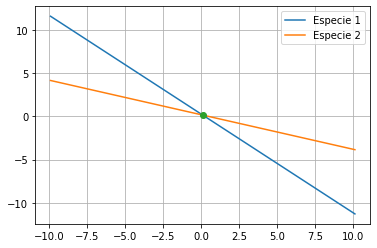

In [36]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos)
a1_1, b1_1, c1_1, a2_1, b2_1, c2_1 = 2,8,7,1,5,2
pto_c_x1 = (a1_1*b2_1 - c1_1*a2_1)/(b1_1*b2_1 - c1_1*c2_1)
pto_c_y1 = (-a1_1*c2_1 + b1_1*a2_1)/(b1_1*b2_1 - c1_1*c2_1)

x1 = np.linspace(pto_c_x1 - 10, pto_c_x1 + 10, 100)

y_pto_c1_1 = (a1_1 - b1_1*x1)/c1_1
y_pto_c1_2 = (a2_1 - c2_1*x1)/b2_1

plt.plot(x1, y_pto_c1_1, label='Especie 1')
plt.plot(x1, y_pto_c1_2, label = 'Especie 2')
plt.plot(pto_c_x1, pto_c_y1, "-o")
plt.grid(True)
plt.legend()

### Caso 2: Denominador negativo y punto de intersección en el primer cuadrante

In [37]:
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    #condiciones que requiere el caso 2
    if  ((a1*b2-a2*c1)<0 and (a1*c2-b1*a2)>0 and (b1*b2-c1*c2)<0) :
        break
a1_2, b1_2, c1_2, a2_2, b2_2, c2_2 = a1,b1,c1,a2,b2,c2
a1_2, b1_2, c1_2, a2_2, b2_2, c2_2

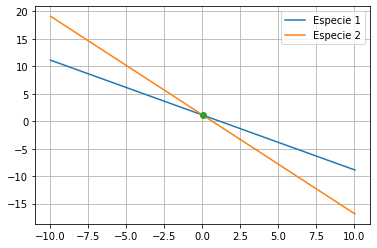

In [38]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos)
a1_2, b1_2, c1_2, a2_2, b2_2, c2_2 = 7,6,6,6,5,9
pto_c_x2 = (a1_2*b2_2 - c1_2*a2_2)/(b1_2*b2_2 - c1_2*c2_2)
pto_c_y2 = (-a1_2*c2_2 + b1_2*a2_2)/(b1_2*b2_2 - c1_2*c2_2)

x2 = np.linspace(pto_c_x2 - 10, pto_c_x2 + 10, 100)

y_pto_c2_1 = (a1_2 - b1_2*x2)/c1_2
y_pto_c2_2 = (a2_2 - c2_2*x2)/b2_2

plt.plot(x2, y_pto_c2_1, label = 'Especie 1' )
plt.plot(x2, y_pto_c2_2, label = 'Especie 2')
plt.plot(pto_c_x2, pto_c_y2, "-o")
plt.grid(True)
plt.legend()

### Caso 3: Intersección no en el primer cuadrante y numerador primera coordenada negativa y segunda positiva

In [93]:
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    if ((a1*b2-a2*c1) > 0 and (a1*c2-b1*a2)>0 and (b1*b2-c1*c2)<0) or ((a1*b2-a2*c1)<0 and (a1*c2-b1*a2)<0 and (b1*b2-c1*c2)>0):
        break
a1_3, b1_3, c1_3, a2_3, b2_3, c2_3 = a1,b1,c1,a2,b2,c2
a1_3, b1_3, c1_3, a2_3, b2_3, c2_3

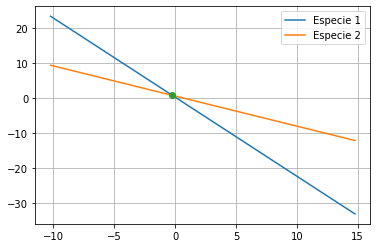

In [94]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos)
a1_3, b1_3, c1_3, a2_3, b2_3, c2_3 = 1,9,4,4,7,6
pto_c_x3= (a1_3*b2_3 - c1_3*a2_3)/(b1_3*b2_3 - c1_3*c2_3)
pto_c_y3 = (-a1_3*c2_3 + b1_3*a2_3)/(b1_3*b2_3 - c1_3*c2_3)

x3 = np.linspace(pto_c_x3 - 10, pto_c_x3 + 15, 100)

y_pto_c3_1 = (a1_3 - b1_3*x3)/c1_3
y_pto_c3_2 = (a2_3 - c2_3*x3)/b2_3

plt.plot(x3, y_pto_c3_1, label = 'Especie 1')
plt.plot(x3, y_pto_c3_2, label = 'Especie 2')
plt.plot(pto_c_x3, pto_c_y3, "-o")
plt.grid(True)
plt.legend()

### Caso 4: Intersección no en el primer cuadrante y numerador primera coordenada positiva y segunda negativa

In [41]:
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    #condiciones que requiere el caso 4
    if  ((a1*b2-a2*c1)<0 and (a1*c2-b1*a2)<0 and (b1*b2-c1*c2)>0) or ((a1*b2-a2*c1)>0 and (a1*c2-b1*a2)>0 and (b1*b2-c1*c2)<0):
        break
        
a1_4, b1_4, c1_4, a2_4, b2_4, c2_4 = a1,b1,c1,a2,b2,c2
a1_4, b1_4, c1_4, a2_4, b2_4, c2_4

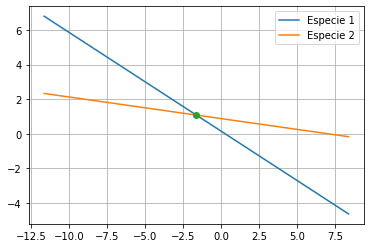

In [42]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos)
a1_4, b1_4, c1_4, a2_4, b2_4, c2_4 = 1, 4,7,7,8,1
pto_c_x4 = (a1_4*b2_4 - c1_4*a2_4)/(b1_4*b2_4 - c1_4*c2_4)
pto_c_y4 = (-a1_4*c2_4 + b1_4*a2_4)/(b1_4*b2_4 - c1_4*c2_4)

x4 = np.linspace(pto_c_x4 - 10, pto_c_x4 + 10, 100)

y_pto_c4_1 = (a1_4 - b1_4*x4)/c1_4
y_pto_c4_2 = (a2_4 - c2_4*x4)/b2_4

plt.plot(x4, y_pto_c4_1, label = 'Especie 1')
plt.plot(x4, y_pto_c4_2, label = 'Especie 2')
plt.plot(pto_c_x4, pto_c_y4, "-o")
plt.grid(True)
plt.legend()

Recogemos todas las gráficas en un resumen

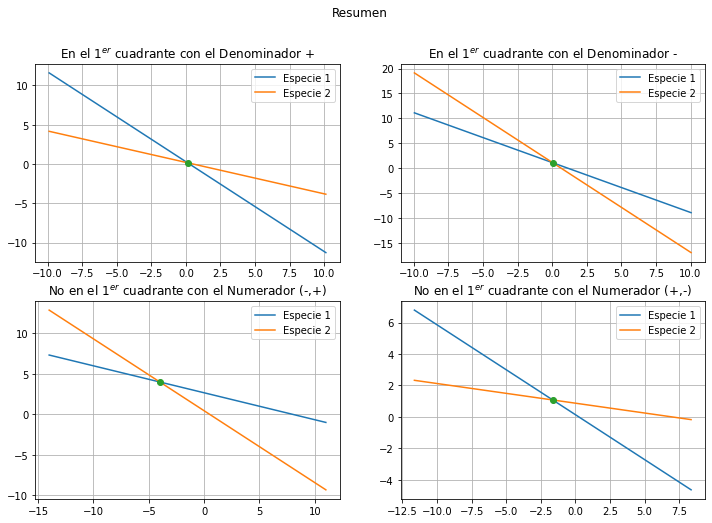

In [43]:
fig = plt.figure(figsize = (12,8)) #Tamaño del grid
fig.suptitle('Resumen')

#1ºCaso
grafico1 = fig.add_subplot(2,2,1)
grafico1.plot(x1, y_pto_c1_1, label = 'Especie 1')
grafico1.plot(x1, y_pto_c1_2, label = 'Especie 2')
grafico1.plot(pto_c_x1, pto_c_y1, "-o")
grafico1.set_title('En el $1^{er}$ cuadrante con el Denominador +')
plt.grid(True)
plt.legend()

#2ºCaso
grafico2 = fig.add_subplot(2,2,2)
grafico2.plot(x2, y_pto_c2_1, label = 'Especie 1' )
grafico2.plot(x2, y_pto_c2_2, label = 'Especie 2')
grafico2.plot(pto_c_x2, pto_c_y2, "-o")
grafico2.set_title('En el $1^{er}$ cuadrante con el Denominador -')
plt.grid(True)
plt.legend()

#3ºCaso
grafico3 = fig.add_subplot(2,2,3)
grafico3.plot(x3, y_pto_c3_1,label = 'Especie 1')
grafico3.plot(x3, y_pto_c3_2, label = 'Especie 2')
grafico3.plot(pto_c_x3, pto_c_y3, "-o")
grafico3.set_title('No en el $1^{er}$ cuadrante con el Numerador (-,+)')
plt.grid(True)
plt.legend()

#4ºCaso
grafico4 = fig.add_subplot(2,2,4)
grafico4.plot(x4, y_pto_c4_1, label = 'Especie 1')
grafico4.plot(x4, y_pto_c4_2, label = 'Especie 2')
grafico4.plot(pto_c_x4, pto_c_y4, "-o")
grafico4.set_title('No en el $1^{er}$ cuadrante con el Numerador (+,-)')
plt.grid(True)
plt.legend()

### Planos de fases

In [44]:
#Definimos función
def F(P, t):
    return [a1*P[0]*(1-P[0]/(a1/b1))-c1*P[0]*P[1] , a2*P[1]*(1-P[1]/(a2/b2))-c2*P[0]*P[1] ]

tiempo = np.linspace(0, 12, 500)

### Caso 1

In [45]:
# Segundo autovalor del punto crítico (K,0)
y = a2_1 - ((a1_1*c2_1)/b1_1)
# Segundo autovalor del punto crítico (0,K)
x = a1_1 - a2_1*c1_1/b2_1

x,y

Ambos dan positivo, luego nos encontramos ante un punto de silla para ambos casos como estudiábamos cualitativamente en apartados previos.
Luego tanto el punto crítico $(0,K)$ como $ (K,0)$ ambos dan puntos de silla para el primer caso.

En cuanto al 4º, debido a su complejidad le asignameos valores concretos para estudiarlo gráficamente.

In [46]:
x4_1= (a1_1*b2_1-a2_1*c1_1)/(b1_1*b2_1-c1_1*c2_1)
y4_1= -((a1_1*c2_1 -a2_1*b1_1)/(b1_1*b2_1-c1_1*c2_1))
autovalor1= -b1_1*x4_1/2 - b2_1*y4_1/2 - np.sqrt(np.complex(b1_1**2*x4_1**2 - 2*b1_1*b2_1*x4_1*y4_1 + b2_1**2*y4_1**2 + 4*c1_1*c2_1*x4_1*y4_1))/2 
autovalor2= -b1_1*x4_1/2 - b2_1*y4_1/2 + np.sqrt(np.complex(b1_1**2*x4_1**2 - 2*b1_1*b2_1*x4_1*y4_1 + b2_1**2*y4_1**2 + 4*c1_1*c2_1*x4_1*y4_1))/2
autovalor1, autovalor2

((-1.3505721941770772+0j), (-0.34173549813061543+0j))

Ambos autovalores son reales y negativos, por lo que será estable y el sistema tenderá a ese punto si ambas poblaciones conviven.

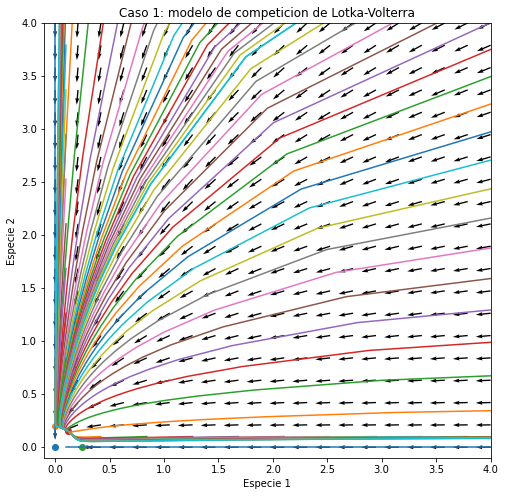

In [47]:
#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = a1_1, b1_1, c1_1, a2_1, b2_1, c2_1

# Condiciones iniciales 
ic = np.linspace(0, 8.0, 20)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 8.0, 20)# -->Valoers de la  Y de la condición del origen


# Malla de puntos
X_1, Y_1 = np.meshgrid(np.linspace(0, 4, 20),  np.linspace(0, 4, 20)) 

# Componentes del vector de dirección:
U_1 = F([X_1, Y_1], tiempo)[0]
V_1 = F([X_1, Y_1], tiempo)[1]

#Campo de vectores unitarios: 
modulo2_1 = U_1**2 + V_1**2
D1_1 = np.ones([20, 20])
D2_1 = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2_1[i, j] == 0:
            D1_1[i, j] = 0
            D2_1[i, j] = 0
        else:
            D1_1[i, j] = U_1[i, j]/np.sqrt(modulo2_1[i, j])
            D2_1[i, j] = V_1[i, j]/np.sqrt(modulo2_1[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X_1, Y_1, D1_1, D2_1, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 8.0] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [8.0, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 1: modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,a2/b2)
plt.scatter(a1/b1,0)
plt.scatter((a1*b2-a2*c1)/(b1*b2-c1*c2),-(a1*c2-a2*b1)/(b1*b2-c1*c2))
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.show()

### Caso 2

In [48]:
# Segundo autovalor del punto crítico (K,0)
y = a2_2 - ((a1_2*c2_2)/b1_2)
# Segundo autovalor del punto crítico (0,K)
x = a1_2 - a2_2*c1_2/b2_2

x,y

Autovalores negativos para ambas coordenadas de ambos puntos críticos $(0,K)$ y $(K,0)$. Luego, estos puntos son estables por lo que el sistema tenderá a ellos.

Autovalores concretos para el 4º punto crítico:

In [49]:
x4_2= (a1_2*b2_2-a2_2*c1_2)/(b1_2*b2_2-c1_2*c2_2)
y4_2= -((a1_2*c2_2 -a2_2*b1_2)/(b1_2*b2_2-c1_2*c2_2))
autovalor1_2= -b1_2*x4_2/2 - b2_2*y4_2/2 - np.sqrt(np.complex(b1_2**2*x4_2**2 - 2*b1_2*b2_2*x4_2*y4_2 + b2_2**2*y4_2**2 + 4*c1_2*c2_2*x4_2*y4_2))/2 
autovalor2_2= -b1_2*x4_2/2 - b2_2*y4_2/2 + np.sqrt(np.complex(b1_2**2*x4_2**2 - 2*b1_2*b2_2*x4_2*y4_2 + b2_2**2*y4_2**2 + 4*c1_2*c2_2*x4_2*y4_2))/2
autovalor1_2, autovalor2_2

((-6.060624437162247+0j), (0.18562443716224664+0j))

Autovalores reales con signo contrario => punto de silla (inestable).

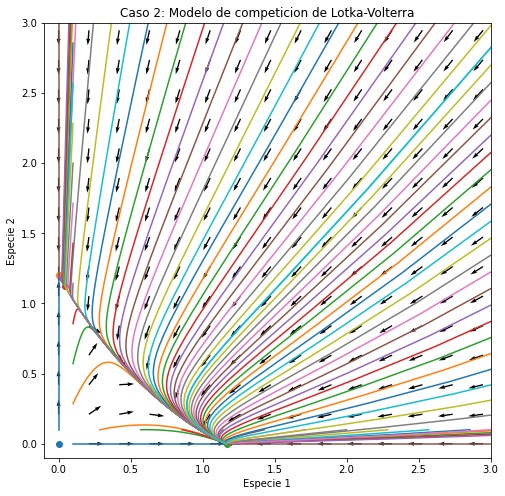

In [50]:
#Variables aleatorias:
a1,b1,c1,a2,b2,c2 = a1_2, b1_2, c1_2, a2_2, b2_2, c2_2


# Condiciones iniciales 
ic = np.linspace(0, 4.0, 25)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 4.0, 15)# --> "" Y ""


# Malla de puntos
X_2, Y_2 = np.meshgrid(np.linspace(0, 4, 20),  np.linspace(0, 4, 20)) 

# Componentes del vector de dirección:
U_2 = F([X_2, Y_2], tiempo)[0]
V_2 = F([X_2, Y_2], tiempo)[1]

#Campo de vectores unitarios: 
modulo2_2 = U_2**2 + V_2**2
D1_2 = np.ones([20, 20])
D2_2 = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2_2[i, j] == 0:
            D1_2[i, j] = 0
            D2_2[i, j] = 0
        else:
            D1_2[i, j] = U_2[i, j]/np.sqrt(modulo2_2[i, j])
            D2_2[i, j] = V_2[i, j]/np.sqrt(modulo2_2[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X_2, Y_2, D1_2, D2_2, scale = 30)

# Soluciones del sistema:
for r in dc:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4.0] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [4.0, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 2: Modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,a2/b2)
plt.scatter(a1/b1,0)
plt.scatter((a1*b2-a2*c1)/(b1*b2-c1*c2),-(a1*c2-a2*b1)/(b1*b2-c1*c2))
plt.xlim(-0.1,3)
plt.ylim(-0.1,3)

plt.show()

Observamos como en vías generales el sistema tiende a la extinción de la especie 2.

### Caso 3

In [51]:
# Segundo autovalor del punto crítico (K,0)
y = a2_3 - ((a1_3*c2_3)/b1_3)

# Segundo autovalor del punto crítico (0,K)
x = a1_3 - a2_3*c1_3/b2_3

x,y

Para el segundo punto crítico $(K,0)$ la segunda coordenada es negativa luego es estable, mientras que para el tercero $(0,K)$ es positiva por lo que será inestable.

In [52]:
x4_3= (a1_3*b2_3-a2_3*c1_3)/(b1_3*b2_3-c1_3*c2_3)
y4_3= -((a1_3*c2_3 -a2_3*b1_3)/(b1_3*b2_3-c1_3*c2_3))
autovalor1_3= -b1_3*x4_3/2 - b2_3*y4_3/2 - np.sqrt(np.complex(b1_3**2*x4_3**2 - 2*b1_3*b2_3*x4_3*y4_3 + b2_3**2*y4_3**2 + 4*c1_3*c2_3*x4_3*y4_3))/2 
autovalor2_3= -b1_3*x4_3/2 - b2_3*y4_3/2 + np.sqrt(np.complex(b1_3**2*x4_3**2 - 2*b1_3*b2_3*x4_3*y4_3 + b2_3**2*y4_3**2 + 4*c1_3*c2_3*x4_3*y4_3))/2
autovalor1_3, autovalor2_3

((-20+0j), (-12+0j))

Autovalores complejos con parte real negativa. Por tanto, tenemos un 4º punto crítico con oscilaciones estable. Sin embargo, como este está fuera del primer cuadrante no tiene sentido biológico y no es relevante para nuestro estudio.

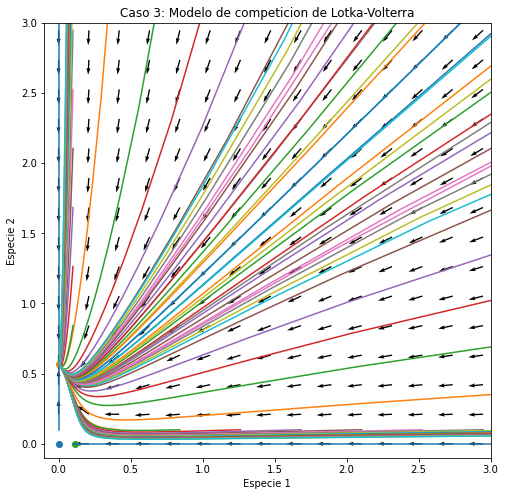

In [95]:
#Variables aleatorias:
a1,b1,c1,a2,b2,c2 = a1_3, b1_3, c1_3, a2_3, b2_3, c2_3


# Condiciones iniciales 
ic = np.linspace(0, 8.0, 20)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 8.0, 20)# --> "" Y ""


# Malla de puntos
X_3, Y_3 = np.meshgrid(np.linspace(0, 4, 20),  np.linspace(0, 4, 20)) 

# Componentes del vector de dirección:
U_3 = F([X_3, Y_3], tiempo)[0]
V_3 = F([X_3, Y_3], tiempo)[1]

#Campo de vectores unitarios: 
modulo2_3 = U_3**2 + V_3**2
D1_3 = np.ones([20, 20])
D2_3 = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2_3[i, j] == 0:
            D1_3[i, j] = 0
            D2_3[i, j] = 0
        else:
            D1_3[i, j] = U_3[i, j]/np.sqrt(modulo2_3[i, j])
            D2_3[i, j] = V_3[i, j]/np.sqrt(modulo2_3[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X_3, Y_3, D1_3, D2_3, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4.0] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [4.0, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

    plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 3: Modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,a2/b2)
plt.scatter(a1/b1,0)
plt.xlim(-0.1,3)
plt.ylim(-0.1,3)


plt.show()

### Caso 4

In [54]:
# Segundo autovalor del punto crítico (K,0)
y = a2_4 - ((a1_4*c2_4)/b1_4)

# Segundo autovalor del punto crítico (0,K)
x = a1_4 - ((a2_4*c1_4)/b2_4)

x,y

Para este caso el primer autovalor será negativo y el segundo positivo (lo contrario al caso anterior). Por tanto, el punto crítico $(K,0)$ es inestable y el punto crítico $(0,K)$ será estable. 

In [96]:
x4_4= (a1_4*b2_4-a2_4*c1_4)/(b1_4*b2_4-c1_4*c2_4)
y4_4= -((a1_4*c2_4 -a2_4*b1_4)/(b1_4*b2_4-c1_4*c2_4))
autovalor1_4= -b1_4*x4_4/2 - b2_4*y4_4/2 - np.sqrt(np.complex(b1_4**2*x4_4**2 - 2*b1_4*b2_4*x4_4*y4_4 + b2_4**2*y4_4**2 + 4*c1_4*c2_4*x4_4*y4_4))/2 
autovalor2_4= -b1_4*x4_4/2 - b2_4*y4_4/2 + np.sqrt(np.complex(b1_4**2*x4_4**2 - 2*b1_4*b2_4*x4_4*y4_4 + b2_4**2*y4_4**2 + 4*c1_4*c2_4*x4_4*y4_4))/2
autovalor1_4, autovalor2_4

((-7.775102077919831+0j), (5.695102077919829+0j))

Autovalores reales con el signo contrario => Punto de silla (inestable).

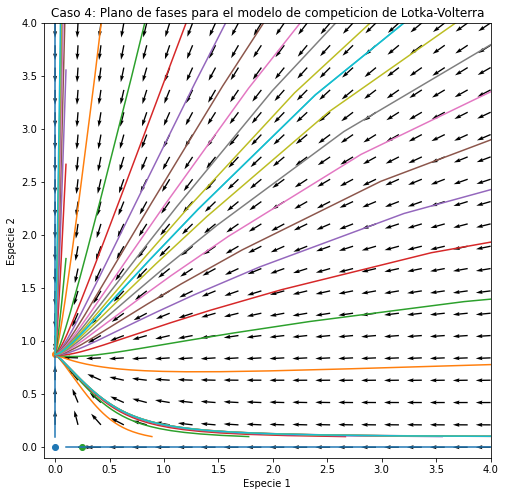

In [56]:
a1,b1,c1,a2,b2,c2 = a1_4, b1_4, c1_4, a2_4, b2_4, c2_4

# Condiciones iniciales 
ic = np.linspace(0, 8.0, 10)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 8.0, 10)# --> "" Y ""


# Malla de puntos
X_4, Y_4 = np.meshgrid(np.linspace(0, 4, 20),  np.linspace(0, 4, 20)) #Mesgrid tiene que darle los mismos valores que a ic y dc para que se fill todo el square

# Componentes del vector de dirección:
U_4 = F([X_4, Y_4], tiempo)[0]
V_4 = F([X_4, Y_4], tiempo)[1]

#Campo de vectores unitarios: 
modulo2_4 = U_4**2 + V_4**2
D1_4 = np.ones([20, 20])
D2_4 = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2_4[i, j] == 0:
            D1_4[i, j] = 0
            D2_4[i, j] = 0
        else:
            D1_4[i, j] = U_4[i, j]/np.sqrt(modulo2_4[i, j])
            D2_4[i, j] = V_4[i, j]/np.sqrt(modulo2_4[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X_4, Y_4, D1_4, D2_4, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 8.0] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [8.0, r]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 4: Plano de fases para el modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,a2/b2)
plt.scatter(a1/b1,0)
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)


plt.show()

Haciendo un resumen gráfico de los 4 casos:

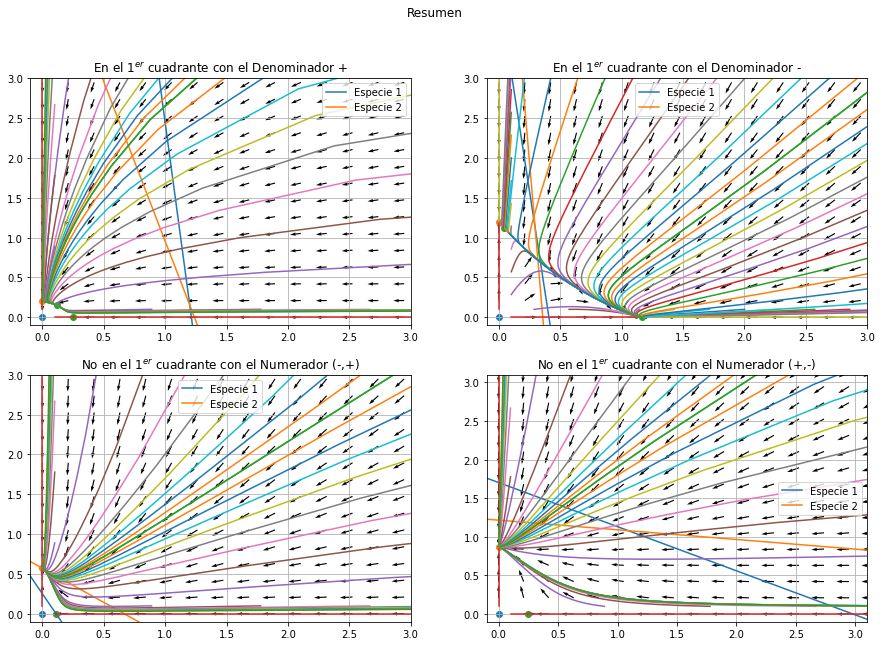

In [97]:
fig = plt.figure(figsize = (15,10)) #Tamaño del grid
fig.suptitle('Resumen')

#Primera gráfica
grafico1 = fig.add_subplot(2,2,1)
grafico1.plot(x1, y_pto_c1_1, label = 'Especie 1')
grafico1.plot(x1, y_pto_c1_2, label = 'Especie 2')
grafico1.quiver(X_1, Y_1, D1_1, D2_1, angles = 'xy', scale = 35, headwidth = 3)
grafico1.plot(pto_c_x1, pto_c_y1, "-o")

#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = a1_1, b1_1, c1_1, a2_1, b2_1, c2_1

ic_1 = np.linspace(0, 8.0, 10)# --> Valores de la X de la condición del origen
dc_1 = np.linspace(0, 8.0, 10)# -->Valoers de la  Y de la condición del origen
# Soluciones del sistema:
for s in ic_1:
    P0_1 = [s, 0.1] #El 3 lo defino yo 
    Ps_1 = scint.odeint(F, P0_1, tiempo)
    grafico1.plot(Ps_1[:,0], Ps_1[:,1], "-")
    
for s in ic_1:
    P0_1 = [s, 8.0] #El 3 lo defino yo 
    Ps_1 = scint.odeint(F, P0_1, tiempo)
    grafico1.plot(Ps_1[:,0], Ps_1[:,1], "-")
    
for s in dc_1:
    P0_1 = [0.1, s]
    Ps_1 = scint.odeint(F, P0_1, tiempo)
    grafico1.plot(Ps_1[:,0], Ps_1[:,1], "-")
    
for s in dc_1:
    P0_1 = [8.0, s]
    Ps_1 = scint.odeint(F, P0_1, tiempo)
    grafico1.plot(Ps_1[:,0], Ps_1[:,1], "-")
grafico1.set_title('En el $1^{er}$ cuadrante con el Denominador +')
grafico1.scatter(0,0)
grafico1.scatter(0,a2/b2)
grafico1.scatter(a1/b1,0)
grafico1.set_xlim([-0.1,3])
grafico1.set_ylim([-0.1,3])
plt.grid(True)
plt.legend()

#Segunda gráfica
grafico2 = fig.add_subplot(2,2,2)
grafico2.plot(x2, y_pto_c2_1, label ='Especie 1')
grafico2.plot(x2, y_pto_c2_2, label ='Especie 2')
grafico2.plot(pto_c_x2, pto_c_y2, "-o")
grafico2.quiver(X_2, Y_2, D1_2, D2_2, scale = 30)

#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = a1_2, b1_2, c1_2, a2_2, b2_2, c2_2
# Condiciones iniciales 
ic_2 = np.linspace(0, 4, 15)# --> Valores de la X de la condición del origen
dc_2 = np.linspace(0, 4, 15)# --> "" Y ""
# Soluciones del sistema:
for t in ic_2:
    P0_2 = [t, 0.1] #El 3 lo defino yo 
    Ps_2 = scint.odeint(F, P0_2, tiempo)
    grafico2.plot(Ps_2[:,0], Ps_2[:,1], "-")
    
for t in ic_2:
    P0_2 = [t, 4.0] #El 3 lo defino yo 
    Ps_2 = scint.odeint(F, P0_2, tiempo)
    grafico2.plot(Ps_2[:,0], Ps_2[:,1], "-")
    
for t in dc_2:
    P0_2 = [0.1, t]
    Ps_2 = scint.odeint(F, P0_2, tiempo)
    grafico2.plot(Ps_2[:,0], Ps_2[:,1], "-")
    
for t in dc_2:
    P0_2 = [4.0, t]
    Ps_2 = scint.odeint(F, P0_2, tiempo)
    grafico2.plot(Ps_2[:,0], Ps_2[:,1], "-")

grafico2.set_title('En el $1^{er}$ cuadrante con el Denominador -')
grafico2.scatter(0,0)
grafico2.scatter(0,a2/b2)
grafico2.scatter(a1/b1,0)
grafico2.set_xlim([-0.1,3])
grafico2.set_ylim([-0.1,3])
plt.grid(True)
plt.legend()

#Tercera gráfica
grafico3 = fig.add_subplot(2,2,3)
grafico3.plot(x3, y_pto_c3_1, label ='Especie 1')
grafico3.plot(x3, y_pto_c3_2, label ='Especie 2')
grafico3.plot(pto_c_x3, pto_c_y3, "-o")
grafico3.quiver(X_3, Y_3, D1_3, D2_3, scale = 30)

#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = a1_3, b1_3, c1_3, a2_3, b2_3, c2_3
# Condiciones iniciales 
ic = np.linspace(0, 8.0, 10)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 8.0, 10)# --> "" Y ""

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    grafico3.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 8.0] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    grafico3.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F, P0, tiempo)
    grafico3.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [8.0, r]
    Ps = scint.odeint(F, P0, tiempo)
    grafico3.plot(Ps[:,0], Ps[:,1], "-")
grafico3.set_title('No en el $1^{er}$ cuadrante con el Numerador (-,+)')
grafico3.scatter(0,0)
grafico3.scatter(0,a2/b2)
grafico3.scatter(a1/b1,0)
grafico3.set_xlim([-0.1,3])
grafico3.set_ylim([-0.1,3])
plt.grid(True)
plt.legend()

#Cuarta gráfica
grafico4 = fig.add_subplot(2,2,4)
grafico4.plot(x4, y_pto_c4_1, label ='Especie 1')
grafico4.plot(x4, y_pto_c4_2, label ='Especie 2')
grafico4.plot(pto_c_x4, pto_c_y4, "-o")
grafico4.quiver(X_4, Y_4, D1_4, D2_4, scale = 30)
#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = a1_4, b1_4, c1_4, a2_4, b2_4, c2_4
ic = np.linspace(0, 8.0, 10)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 8.0, 10)# --> "" Y ""

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    grafico4.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 8.0] #El 3 lo defino yo 
    Ps = scint.odeint(F, P0, tiempo)
    grafico4.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F, P0, tiempo)
    grafico4.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [8.0, r]
    Ps = scint.odeint(F, P0, tiempo)
    grafico4.plot(Ps[:,0], Ps[:,1], "-")
grafico4.set_title('No en el $1^{er}$ cuadrante con el Numerador (+,-)')
grafico4.scatter(0,0)
grafico4.scatter(0,a2/b2)
grafico4.scatter(a1/b1,0)
grafico4.set_xlim([-0.1,3.1])
grafico4.set_ylim([-0.1,3.1])
plt.grid(True)
plt.legend()

Ahora pasamos al apartado 7

__7. Interpretar estas situaciones en términos de los parámetros de competición intraespecie e interespecie.__ 

El producto $b_1b_2$ es una medida conjunta de la competición intraespecies del sistema. Así mismo, el producto $c_1c_2$ es una medida conjunta de la competición interespecies del sistema.

La competencia intraespecie significa la competencia entre individuos de la misma especie, mientras que la competencia interespecie entre individuos de distintas especies.

#### Caso 1: El punto de intersección se encuentra en el primer cuadrante con el denominador positivo.

Como mencionábamos anteriormente, las condiciones para que se de este caso son:
 * $a_1 b_2 - a_2 c_1$ > 0
 * $a_1 c_2 - a_2 b_1$ < 0
 * $b_1 b_2 - c_1 c_2$ > 0 => $b_1 b_2 > c_1 c_2$

La tercera condición nos indica que la competición intraespecie es superior a la competición interespecie. Si observamos la primera gráfica, vemos que los puntos críticos $(K,0)$ y $(0,K)$ son inestables al tener que cumplirse las condiciones 1 y 2 que hace que los autovalores sean reales con distinto signo (punto de silla). Por otro lado, el 4º punto crítico debido a estas condiciones tiene autovalores negativos que los hacen estable (nodo impropio sumidero). Por tanto, en este caso se llega a un equilibrio entre ambas especies siendo la influencia principal la competición intraespecie.

#### Caso 2: El punto de intersección está en el primer cuadrante con el denominador negativo.

Las condiciones para que se de este caso son:
* $a_1 b_2 - a_2 c_1$ < 0
* $a_1 c_2 - a_2 b_1$ > 0
* $b_1 b_2 - c_1 c_2$ < 0 => $c_1 c_2$ > $b_1 b_2$

De nuevo nos fijamos en la 3º condición, esta nos indica que la competición intraespecie en este caso es inferior a la competición interespecie.
Si observamos la segunda gráfica, las condiciones 1 y 2 provocan que los puntos críticos $(K,0)$ y $(0,K)$ sean estables al tener autovalores reales negativos. El 4º punto crítico sin embargo es inestable con autovalores reales de distinto signo lo que lleva a un punto de silla.
Bajo estas condiciones, la influencia principal en el sistema es la competición interespecie, donde la población de individuos de una especie está más condicionada por la competencia contra individuos de la población de la otra especie.


#### Caso 3:  El punto de intersección no está en el primer cuadrante con el numerador de la primera coordenada negativa y el de la segunda positiva.

De nuevo enunciamos las condiciones de este caso:
* $a_1 b_2 - a_2 c_1$ < 0 --> $\frac{b_2}{c_1} < \frac{a_2}{a_1} $
* $a_1 c_2 - a_2 b_1$ < 0 --> $\frac{c_2}{b_1} < \frac{a_2}{a_1} $

Dadas estas condiciones se puede dar tanto la competición interespecie como la intraespecie ya que ocurren ambas situaciones $c_1 c_2$ > $b_1 b_2$ y $c_1 c_2$ < $b_1 b_2$ 

En ausencia de este punto crítico 4, se derivará a la extinción de una especie y la predominancia de otra para la mayoría de las condiciones iniciales. Para el caso 3 predomina la especie 1 (las condiciones iniciales tienden a la solución de equilibrio ($\frac{a_1}{b_1}$, 0). 

#### Caso 4: el punto de intersección no está en el primer cuadrante con el numerador de la primera coordenada positiva y el de la segunda negativa. 

Las condiciones de este caso son:
* $a_1 b_2 - a_2 c_1$ > 0 $\frac{b_2}{c_1} > \frac{a_2}{a_1} $
* $a_1 c_2 - a_2 b_1$ > 0 $\frac{c_2}{b_1} > \frac{a_2}{a_1} $

Dadas estas condiciones se puede dar tanto la competición interespecie como la intraespecie ya que ocurren ambas situaciones $c_1 c_2$ > $b_1 b_2$ y $c_1 c_2$ < $b_1 b_2$.

Debido a la ausencia del punto crítico 4, en vías generales una especie derivará a la extinción y la otra crecerá de forma logística, siendo en este caso 4 la especie 2 la predominante ($\frac{a_2}{b_2}$, 0). 

__8. Considerar $k_1=k_2$ e interpretar los diferentes tipos de comportamiento usando el parámetro $\gamma_i=c_i/b_i.$__

Observad que en términos de $k_i$ y $\gamma_i$ el modelo se pude escribir como

\begin{align}
 \frac{dx}{dt} &= a_1x\left(1-\frac{x}{k_1}\right)-\frac{\gamma_1}{k_1}xy\\
 \frac{dy}{dt} &= a_2y\left(1-\frac{y}{k_2}\right)-\frac{\gamma_2}{k_2}xy
\end{align}

In [58]:
#Definimos el nuevo sistema
sp.init_printing()
x, y = sp.symbols('x y')
k, gamma_1, gamma_2, a1, a2, b1, b2, c1, c2 = sp.symbols('k gamma_1 gamma_2 a1 a2 b1 b2 c1 c2', positive=True)

f= a1*x* (1 - x/k - gamma_1/k*y)
g= a2*y*(1 - y/k - gamma_2/k*x)
f, g

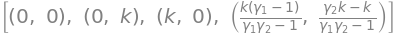

In [59]:
pto_c=sp.solve([f, g], (x, y))
pto_c

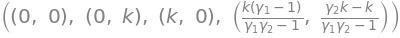

In [60]:
pto_1 = pto_c[0]
pto_2 = pto_c[1]
pto_3 = pto_c[2]
pto_4 = pto_c[3]

pto_1,pto_2,pto_3,pto_4

In [61]:
Jacob = sp.Matrix([[f.diff(x), f.diff(y)],[g.diff(x), g.diff(y)]])
Jacob

⎡   ⎛  γ₁⋅y       x⎞   a₁⋅x          -a₁⋅γ₁⋅x          ⎤
⎢a₁⋅⎜- ──── + 1 - ─⎟ - ────          ─────────         ⎥
⎢   ⎝   k         k⎠    k                k             ⎥
⎢                                                      ⎥
⎢        -a₂⋅γ₂⋅y               ⎛  γ₂⋅x       y⎞   a₂⋅y⎥
⎢        ─────────           a₂⋅⎜- ──── + 1 - ─⎟ - ────⎥
⎣            k                  ⎝   k         k⎠    k  ⎦

In [62]:
Jacob_pto_1 = Jacob.subs({x:pto_1[0], y:pto_1[1]})
Jacob_pto_1

⎡a₁  0 ⎤
⎢      ⎥
⎣0   a₂⎦

El punto crítico trivial es de nuevo inestable dado que ambos autovalores son reales y positivos. Por tanto, no repetiremos su estudio durante los siguientes casos.

In [63]:
Jacob_pto_2 = Jacob.subs({x:pto_2[0], y:pto_2[1]})
Jacob_pto_2

⎡a₁⋅(1 - γ₁)   0 ⎤
⎢                ⎥
⎣  -a₂⋅γ₂     -a₂⎦

In [64]:
autovalores2_m = sp.simplify(Jacob_pto_2.eigenvals())
sp.simplify(autovalores2_m)

En este punto se produce la misma situación que antes. El primer autovalor será siempre negativo mientras que el valor del segundo depende de los parámetros $a_1$ y $\gamma_1$. 
El punto tendrá dos comportamientos distintos:
- Cuando $\gamma_1 > 1$: el segundo autovalor será real y negativo siendo un nodo estable (sumidero) propio o impropio en función de si $a_2 = a_1(-\gamma_1+1)$ o no.
- Cuando $\gamma_1 < 1$: el segundo autovalor será real y positivo adquiriendo el punto un comportamiento de punto de silla.

In [65]:
Jacob_pto_3 = Jacob.subs({x:pto_3[0], y:pto_3[1]})
Jacob_pto_3

⎡-a₁    -a₁⋅γ₁   ⎤
⎢                ⎥
⎣ 0   a₂⋅(1 - γ₂)⎦

In [66]:
autovalores3_m = sp.simplify(Jacob_pto_3.eigenvals())
sp.simplify(autovalores3_m)

Caso muy similar al que teníamos previamente. El primer autovalor es siempre negativo mientras que el segundo autovalor depende de los valores de los parámetros $a_2$ y $\gamma_2$. Dos comportamientos posibles:
- $\gamma_2 > 1$: el segundo autovalor será real y negativo siendo un nodo estable (sumidero) propio o impropio en función de si $a_2 = a_1(-\gamma_1+1)$ o no.
- $\gamma_2 < 1$ : el segundo autovalor será real y positivo adquiriendo el punto un comportamiento de punto de silla.

In [67]:
Jacob_pto_4 = Jacob.subs({x:pto_4[0], y:pto_4[1]})
sp.simplify(Jacob_pto_4)

⎡ -a₁⋅(γ₁ - 1)     -a₁⋅γ₁⋅(γ₁ - 1) ⎤
⎢ ─────────────    ────────────────⎥
⎢   γ₁⋅γ₂ - 1         γ₁⋅γ₂ - 1    ⎥
⎢                                  ⎥
⎢-a₂⋅γ₂⋅(γ₂ - 1)    -a₂⋅(γ₂ - 1)   ⎥
⎢────────────────   ─────────────  ⎥
⎣   γ₁⋅γ₂ - 1         γ₁⋅γ₂ - 1    ⎦

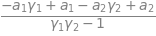

In [68]:
trazaJ4_m = sp.simplify(np.trace(Jacob_pto_4))
trazaJ4_m

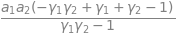

In [69]:
detJ4_m = sp.simplify(sp.det(Jacob_pto_4))
detJ4_m

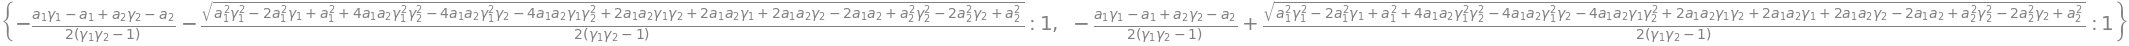

In [70]:
autovalores4_m = sp.simplify(Jacob_pto_4.eigenvals())
sp.simplify(autovalores4_m)

A pesar de la simplificación, este punto crítico sigue dando unos autovalores díficiles de analizar. Por lo que volvemos a realizar el estudio por casos.

### Caso 1

In [71]:
import random as r
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    if (((a1/b1)*(c1/b1 -1))>0 and ((c2/b2 - 1)*a1/b1)>0 and (c1/b1*c2/b2 - 1)>0 and a1/b1==a2/b2) :
        break
a1,b1,c1,a2,b2,c2

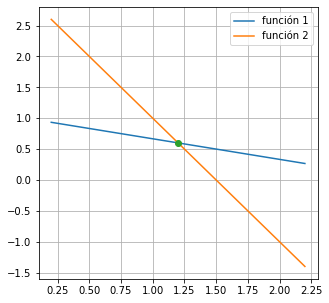

In [72]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos)
a1, b1, c1, a2, b2, c2 = 9,3,9,3,1,2
gam1=c1/b1
gam2=c2/b2
k= a1/b1

plt.figure(figsize=(5,5))

pto_x1 = (k*(gam1 - 1))/(gam1*gam2 - 1)
pto_y1 = (gam2*k - k)/(gam1*gam2 - 1)

x1=np.linspace(pto_x1-1, pto_x1+1, 100)

y_p1_1 = (k - x1)/gam1
y_p1_2 = k -gam2*x1
    
plt.plot(x1, y_p1_1, label = 'función 1')
plt.plot(x1, y_p1_2, label = 'función 2')

plt.plot(pto_x1, pto_y1, "-o")
plt.legend()

plt.grid()
plt.show()

In [73]:
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
autovalor1_1m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) - np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor1_2m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) + np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor1_1m, autovalor1_2m

((-6+0j), (1.8000000000000003+0j))

In [74]:
def F_m(P, t):
    return [a1*P[0]*(1-P[0]/k -(gamma_1/k)*P[1]) , a2*P[1]*(1-P[1]/k -(gamma_2/k)*P[0])]

tiempo = np.linspace(0, 12, 500)

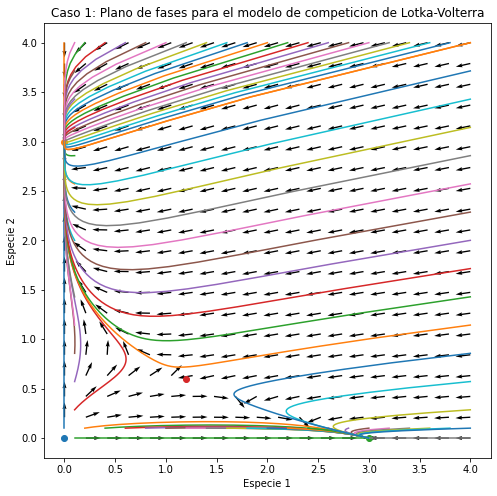

In [75]:
a1, b1, c1, a2, b2, c2 = 9,3,9,3,1,2

gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1

# Condiciones iniciales 
ic = np.linspace(0, 4, 21)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 4, 15)# --> "" Y ""


# Malla de puntos
X1m, Y1m = np.meshgrid(np.linspace(0, 4, 20),  np.linspace(0, 4,20)) #Mesgrid tiene que darle los mismos valores que a ic y dc para que se fill todo el square

# Componentes del vector de dirección:
U_1m = F_m([X1m, Y1m], tiempo)[0]
V_1m = F_m([X1m, Y1m], tiempo)[1]

#Campo de vectores unitarios: 
modulo2 = U_1m**2 + V_1m**2
D1_1m = np.ones([20, 20])
D2_1m = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2[i, j] == 0:
            D1_1m[i, j] = 0
            D2_1m[i, j] = 0
        else:
            D1_1m[i, j] = U_1m[i, j]/np.sqrt(modulo2[i, j])
            D2_1m[i, j] = V_1m[i, j]/np.sqrt(modulo2[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X1m, Y1m, D1_1m, D2_1m, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [4,r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 1: Modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,k)
plt.scatter(k,0)
plt.scatter(k*(gamma_1 - 1)/(gamma_1*gamma_2 - 1), (gamma_2*k - k)/(gamma_1*gamma_2 - 1))
plt.show()

#### Caso 2

In [76]:
import random as r
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    if (((a1/b1)*(c1/b1 -1))<0 and ((c2/b2 - 1)*a1/b1)<0 and (c1/b1*c2/b2 - 1)<0 and a1/b1==a2/b2) :
        break
a1,b1,c1,a2,b2,c2

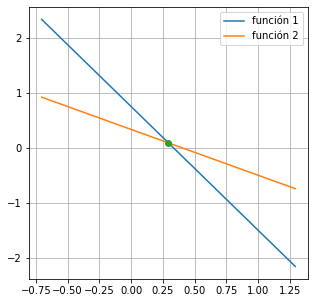

In [77]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos)
a1, b1, c1, a2, b2, c2 = 3,9,4,2,6,5
gam1=c1/b1
gam2=c2/b2
k= a1/b1

plt.figure(figsize=(5,5))

pto_x2 = (k*(gam1 - 1))/(gam1*gam2 - 1)
pto_y2 = (gam2*k - k)/(gam1*gam2 - 1)

x2=np.linspace(pto_x2-1, pto_x2+1, 100)

y_p2_1 = (k - x2)/gam1
y_p2_2 = k -gam2*x2
    
plt.plot(x2, y_p2_1, label = 'función 1')
plt.plot(x2, y_p2_2, label = 'función 2')

plt.plot(pto_x2, pto_y2, "-o")
plt.legend()

plt.grid()
plt.show()

In [78]:
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
autovalor2_1m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) - np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor2_2m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) + np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor2_1m, autovalor2_2m

((-0.30755640840722087+0j), (-2.868914179828073+0j))

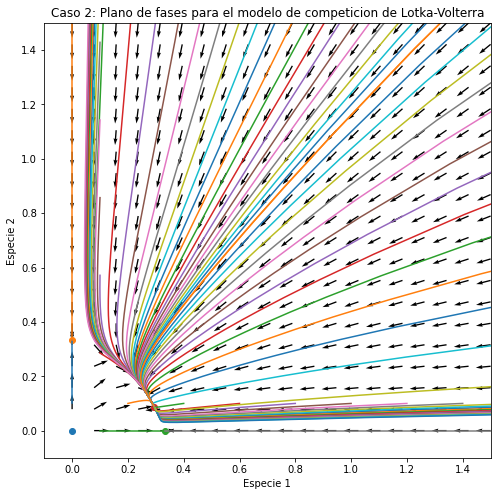

In [79]:
a1, b1, c1, a2, b2, c2 = 3,9,4,2,6,5

gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1

# Condiciones iniciales 
ic = np.linspace(0, 4, 21)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 4, 15)# --> "" Y ""


# Malla de puntos
X2m, Y2m = np.meshgrid(np.linspace(0, 1.5, 20),  np.linspace(0, 1.5,20)) #Mesgrid tiene que darle los mismos valores que a ic y dc para que se fill todo el square

# Componentes del vector de dirección:
U_2m = F_m([X2m, Y2m], tiempo)[0]
V_2m = F_m([X2m, Y2m], tiempo)[1]

#Campo de vectores unitarios: 
modulo2 = U_2m**2 + V_2m**2
D1_2m = np.ones([20, 20])
D2_2m = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2[i, j] == 0:
            D1_2m[i, j] = 0
            D2_2m[i, j] = 0
        else:
            D1_2m[i, j] = U_2m[i, j]/np.sqrt(modulo2[i, j])
            D2_2m[i, j] = V_2m[i, j]/np.sqrt(modulo2[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X2m, Y2m, D1_2m, D2_2m, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [4,r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 2: Modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,k)
plt.scatter(k,0)
plt.scatter(k*(gamma_1 - 1)/(gamma_1*gamma_2 - 1), (gamma_2*k - k)/(gamma_1*gamma_2 - 1))
plt.xlim(-0.1,1.5)
plt.ylim(-0.1,1.5)
plt.show()

#### Caso 3

In [80]:
import random as r
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    if (((a1/b1)*(c1/b1 -1))<0 and (((c2/b2 - 1)*a1/b1))>0 and(c1/b1*c2/b2 - 1)>0 and a1/b1==a2/b2) or (((a1/b1)*(c1/b1 -1))>0 and (((c2/b2 - 1)*a1/b1))<0 and(c1/b1*c2/b2 - 1)<0 and a1/b1==a2/b2) :
        break
a1,b1,c1,a2,b2,c2

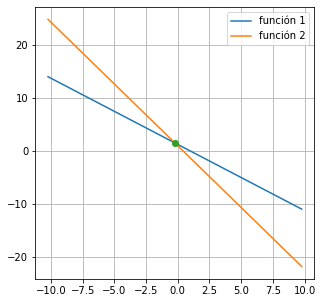

In [81]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos) Estos valores han salido del bucle anterior:
a1, b1, c1, a2, b2, c2 = 5,5,4,3,3,7
gam1=c1/b1
gam2=c2/b2
k= a1/b1

plt.figure(figsize=(5,5))

pto_x3 = (k*(gam1 - 1))/(gam1*gam2 - 1)
pto_y3 = (gam2*k - k)/(gam1*gam2 - 1)

x3=np.linspace(pto_x3-10, pto_x3+10, 100)

y_p3_1 = (k - x3)/gam1
y_p3_2 = k -gam2*x3
    
plt.plot(x3, y_p3_1, label = 'función 1')
plt.plot(x3, y_p3_2, label = 'función 2')

plt.plot(pto_x3, pto_y3, "-o")
plt.legend()

plt.grid()
plt.show()

In [82]:
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
autovalor3_1m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) - np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor3_2m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) + np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor3_1m, autovalor3_2m

((-1.7307692307692302-1.272722469828788j),
 (-1.7307692307692302+1.272722469828788j))

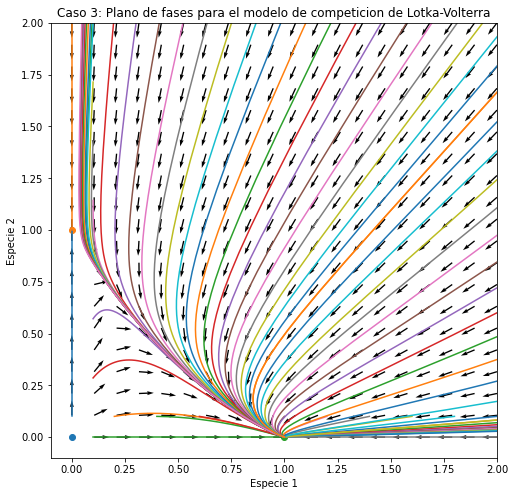

In [83]:
a1, b1, c1, a2, b2, c2 = 5,5,4,3,3,7

gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1

# Condiciones iniciales 
ic = np.linspace(0, 4, 21)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 4, 15)# --> "" Y ""


# Malla de puntos
X3m, Y3m = np.meshgrid(np.linspace(0, 2, 20),  np.linspace(0, 2,20)) #Mesgrid tiene que darle los mismos valores que a ic y dc para que se fill todo el square

# Componentes del vector de dirección:
U_3m = F_m([X3m, Y3m], tiempo)[0]
V_3m = F_m([X3m, Y3m], tiempo)[1]

#Campo de vectores unitarios: 
modulo2 = U_3m**2 + V_3m**2
D1_3m = np.ones([20, 20])
D2_3m = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2[i, j] == 0:
            D1_3m[i, j] = 0
            D2_3m[i, j] = 0
        else:
            D1_3m[i, j] = U_3m[i, j]/np.sqrt(modulo2[i, j])
            D2_3m[i, j] = V_3m[i, j]/np.sqrt(modulo2[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X3m, Y3m, D1_3m, D2_3m, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [4,r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 3: Modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,k)
plt.scatter(k,0)
plt.scatter(k*(gamma_1 - 1)/(gamma_1*gamma_2 - 1), (gamma_2*k - k)/(gamma_1*gamma_2 - 1))
plt.xlim(-0.1,2)
plt.ylim(-0.1,2)
plt.show()

#### Caso 4

In [84]:
import random as r
j=10
OMG=True
while (OMG):
    a1 = r.randrange(1,j)
    b1 = r.randrange(1,j)
    c1 = r.randrange(1,j)
    a2 = r.randrange(1,j)
    b2 = r.randrange(1,j)
    c2 = r.randrange(1,j)
    if (((a1/b1)*(c1/b1 -1))>0 and (((c2/b2 - 1)*a1/b1))<0 and(c1/b1*c2/b2 - 1)>0 and a1/b1==a2/b2) or (((a1/b1)*(c1/b1 -1))<0 and (((c2/b2 - 1)*a1/b1))>0 and(c1/b1*c2/b2 - 1)<0 and a1/b1==a2/b2) :
        break
a1,b1,c1,a2,b2,c2

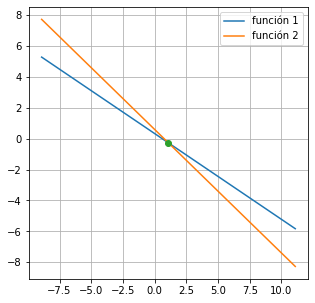

In [85]:
#Fijamos valores obtenidos en el bucle anterior (cambian cada vez que corremos) Estos valores han salido del bucle anterior:
a1, b1, c1, a2, b2, c2 = 3,5,9,3,5,4
gam1=c1/b1
gam2=c2/b2
k= a1/b1

plt.figure(figsize=(5,5))

pto_x4 = (k*(gam1 - 1))/(gam1*gam2 - 1)
pto_y4 = (gam2*k - k)/(gam1*gam2 - 1)

x4=np.linspace(pto_x4-10, pto_x4+10, 100)

y_p4_1 = (k - x4)/gam1
y_p4_2 = k -gam2*x4
    
plt.plot(x4, y_p4_1, label = 'función 1')
plt.plot(x4, y_p4_2, label = 'función 2')

plt.plot(pto_x4, pto_y4, "-o")
plt.legend()

plt.grid()
plt.show()

In [86]:
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
autovalor4_1m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) - np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor4_2m=-(a1*gamma_1 - a1 + a2*gamma_2 - a2)/(2*(gamma_1*gamma_2 - 1)) + np.sqrt(np.complex(a1**2*gamma_1**2 - 2*a1**2*gamma_1 + a1**2 + 4*a1*a2*gamma_1**2*gamma_2**2 - 4*a1*a2*gamma_1**2*gamma_2 - 4*a1*a2*gamma_1*gamma_2**2 + 2*a1*a2*gamma_1*gamma_2 + 2*a1*a2*gamma_1 + 2*a1*a2*gamma_2 - 2*a1*a2 + a2**2*gamma_2**2 - 2*a2**2*gamma_2 + a2**2))/(2*(gamma_1*gamma_2 - 1))
autovalor4_1m, autovalor4_2m

((-3.0000000000000036+0j), (-1.0909090909090873+0j))

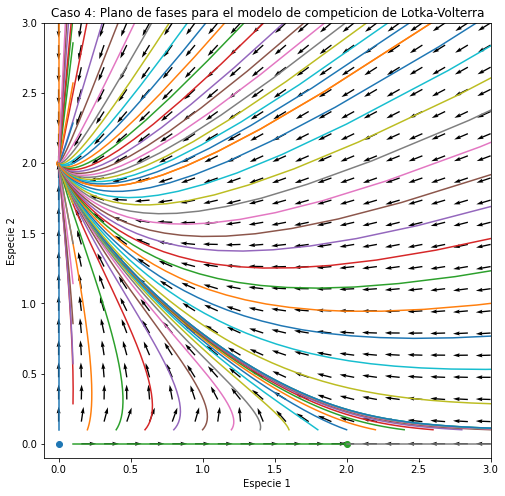

In [87]:
a1, b1, c1, a2, b2, c2 = 2,1,5,8,4,2

gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1

# Condiciones iniciales 
ic = np.linspace(0, 4, 21)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 4, 15)# --> "" Y ""


# Malla de puntos
X4m, Y4m = np.meshgrid(np.linspace(0, 3, 20),  np.linspace(0, 3,20)) #Mesgrid tiene que darle los mismos valores que a ic y dc para que se fill todo el square

# Componentes del vector de dirección:
U_4m = F_m([X4m, Y4m], tiempo)[0]
V_4m = F_m([X4m, Y4m], tiempo)[1]

#Campo de vectores unitarios: 
modulo2 = U_4m**2 + V_4m**2
D1_4m = np.ones([20, 20])
D2_4m = np.ones([20, 20])
for i in range(20):
    for j in range(20):
        if modulo2[i, j] == 0:
            D1_4m[i, j] = 0
            D2_4m[i, j] = 0
        else:
            D1_4m[i, j] = U_4m[i, j]/np.sqrt(modulo2[i, j])
            D2_4m[i, j] = V_4m[i, j]/np.sqrt(modulo2[i, j])

plt.figure(figsize = (8,8))
plt.quiver(X4m, Y4m, D1_4m, D2_4m, scale = 30)

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [4,r]
    Ps = scint.odeint(F_m, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")

plt.xlabel("Especie 1")
plt.ylabel("Especie 2")
plt.title("Caso 4: Modelo de competicion de Lotka-Volterra")

# Puntos de equilibrio del sistema
plt.scatter(0,0)
plt.scatter(0,k)
plt.scatter(k,0)
plt.scatter(k*(gamma_1 - 1)/(gamma_1*gamma_2 - 1), (gamma_2*k - k)/(gamma_1*gamma_2 - 1))
plt.xlim(-0.1,3)
plt.ylim(-0.1,3)
plt.show()

#### Resumen

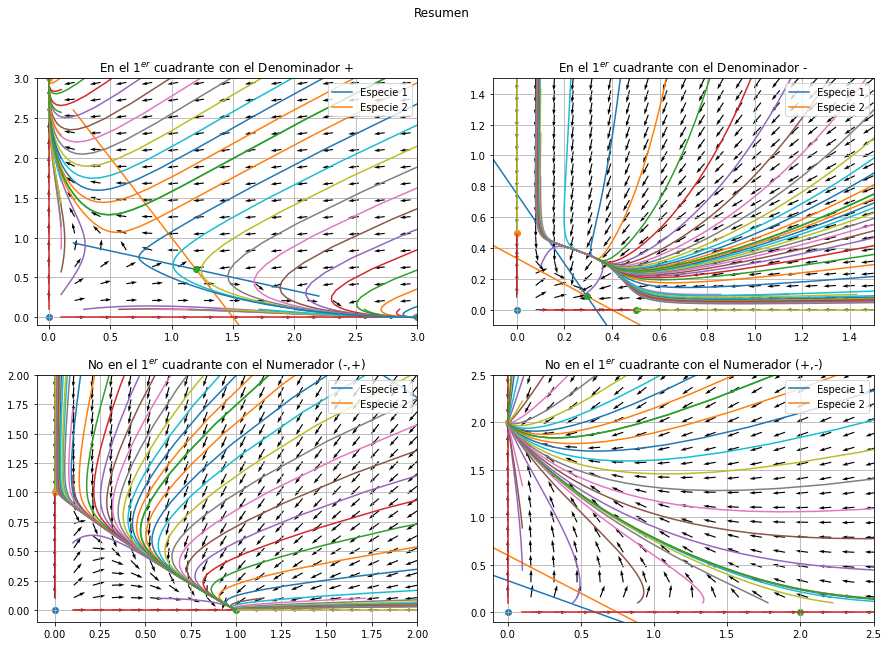

In [98]:
fig = plt.figure(figsize = (15,10)) #Tamaño del grid
fig.suptitle('Resumen')

#Primera gráfica
grafico1m = fig.add_subplot(2,2,1)
grafico1m.plot(x1, y_p1_1, label = 'Especie 1')
grafico1m.plot(x1, y_p1_2, label = 'Especie 2')
grafico1m.quiver(X1m, Y1m, D1_1m, D2_1m, angles = 'xy', scale = 35, headwidth = 3)
grafico1m.plot(pto_x1, pto_y1, "-o")

#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = 9,3,9,6,2,7
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1

ic_1 = np.linspace(0, 4.0, 15)# --> Valores de la X de la condición del origen
dc_1 = np.linspace(0, 4.0, 15)# -->Valoers de la  Y de la condición del origen
# Soluciones del sistema:
for s in ic_1:
    P0_1 = [s, 0.1] #El 3 lo defino yo 
    Ps_1 = scint.odeint(F_m, P0_1, tiempo)
    grafico1m.plot(Ps_1[:,0], Ps_1[:,1], "-")
    
for s in ic_1:
    P0_1 = [s, 4.0] #El 3 lo defino yo 
    Ps_1 = scint.odeint(F_m, P0_1, tiempo)
    grafico1m.plot(Ps_1[:,0], Ps_1[:,1], "-")
    
for s in dc_1:
    P0_1 = [0.1, s]
    Ps_1 = scint.odeint(F_m, P0_1, tiempo)
    grafico1m.plot(Ps_1[:,0], Ps_1[:,1], "-")
    
for s in dc_1:
    P0_1 = [4.0, s]
    Ps_1 = scint.odeint(F_m, P0_1, tiempo)
    grafico1m.plot(Ps_1[:,0], Ps_1[:,1], "-")
grafico1m.set_title('En el $1^{er}$ cuadrante con el Denominador +')
grafico1m.scatter(0,0)
grafico1m.scatter(0,a2/b2)
grafico1m.scatter(a1/b1,0)
grafico1m.set_xlim([-0.1,3])
grafico1m.set_ylim([-0.1,3])
plt.grid(True)
plt.legend()

#Segunda gráfica
grafico2m = fig.add_subplot(2,2,2)
grafico2m.plot(x2, y_p2_1, label ='Especie 1')
grafico2m.plot(x2, y_p2_2, label ='Especie 2')
grafico2m.plot(pto_x2, pto_y2, "-o")
grafico2m.quiver(X2m, Y2m, D1_2m, D2_2m, scale = 30)

#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = 1,2,1,2,4,2
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
# Condiciones iniciales 
ic_2 = np.linspace(0, 4, 15)# --> Valores de la X de la condición del origen
dc_2 = np.linspace(0, 4, 15)# --> "" Y ""
# Soluciones del sistema:
for t in ic_2:
    P0_2 = [t, 0.1] #El 3 lo defino yo 
    Ps_2 = scint.odeint(F_m, P0_2, tiempo)
    grafico2m.plot(Ps_2[:,0], Ps_2[:,1], "-")
    
for t in ic_2:
    P0_2 = [t, 4.0] #El 3 lo defino yo 
    Ps_2 = scint.odeint(F_m, P0_2, tiempo)
    grafico2m.plot(Ps_2[:,0], Ps_2[:,1], "-")
    
for t in dc_2:
    P0_2 = [0.1, t]
    Ps_2 = scint.odeint(F_m, P0_2, tiempo)
    grafico2m.plot(Ps_2[:,0], Ps_2[:,1], "-")
    
for t in dc_2:
    P0_2 = [4.0, t]
    Ps_2 = scint.odeint(F_m, P0_2, tiempo)
    grafico2m.plot(Ps_2[:,0], Ps_2[:,1], "-")

grafico2m.set_title('En el $1^{er}$ cuadrante con el Denominador -')
grafico2m.scatter(0,0)
grafico2m.scatter(0,a2/b2)
grafico2m.scatter(a1/b1,0)
grafico2m.set_xlim([-0.1,1.5])
grafico2m.set_ylim([-0.1,1.5])
plt.grid(True)
plt.legend()

#Tercera gráfica
grafico3m = fig.add_subplot(2,2,3)
grafico3m.plot(x3, y_p3_1, label ='Especie 1')
grafico3m.plot(x3, y_p3_2, label ='Especie 2')
grafico3m.plot(pto_x3, pto_y3, "-o")
grafico3m.quiver(X3m, Y3m, D1_3m, D2_3m, scale = 30)

#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = 9,9,7,4,4,7
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
# Condiciones iniciales 
ic = np.linspace(0, 8.0, 15)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 8.0, 15)# --> "" Y ""

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico3m.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 8.0] #El 3 lo defino yo 
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico3m.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico3m.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [8.0, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico3m.plot(Ps[:,0], Ps[:,1], "-")
grafico3m.set_title('No en el $1^{er}$ cuadrante con el Numerador (-,+)')
grafico3m.scatter(0,0)
grafico3m.scatter(0,a2/b2)
grafico3m.scatter(a1/b1,0)
grafico3m.set_xlim([-0.1,2])
grafico3m.set_ylim([-0.1,2])
plt.grid(True)
plt.legend()

#Cuarta gráfica
grafico4m = fig.add_subplot(2,2,4)
grafico4m.plot(x4, y_p4_1, label ='Especie 1')
grafico4m.plot(x4, y_p4_2, label ='Especie 2')
grafico4m.plot(pto_x4, pto_y4, "-o")
grafico4m.quiver(X4m, Y4m, D1_4m, D2_4m, scale = 30)
#Valores aleatorios: 
a1,b1,c1,a2,b2,c2 = 2,1,5,8,4,2
gamma_1=c1/b1
gamma_2=c2/b2
k= a1/b1
ic = np.linspace(0, 4.0, 10)# --> Valores de la X de la condición del origen
dc = np.linspace(0, 4.0, 10)# --> "" Y ""

# Soluciones del sistema:
for r in ic:
    P0 = [r, 0.1]  
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico4m.plot(Ps[:,0], Ps[:,1], "-")
    
for r in ic:
    P0 = [r, 4.0]  
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico4m.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [0.1, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico4m.plot(Ps[:,0], Ps[:,1], "-")
    
for r in dc:
    P0 = [4.0, r]
    Ps = scint.odeint(F_m, P0, tiempo)
    grafico4m.plot(Ps[:,0], Ps[:,1], "-")
grafico4m.set_title('No en el $1^{er}$ cuadrante con el Numerador (+,-)')
grafico4m.scatter(0,0)
grafico4m.scatter(0,a2/b2)
grafico4m.scatter(a1/b1,0)
grafico4m.set_xlim([-0.1,2.5])
grafico4m.set_ylim([-0.1,2.5])
plt.grid(True)
plt.legend()